In [509]:
# predict happiness score 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [510]:
data=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/World%20Happiness/happiness_score_dataset.csv')

In [511]:
data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [512]:
data.shape

(158, 12)

In [513]:
data.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [514]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [515]:
data.dtypes    

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [516]:
data.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [517]:
data.nunique()


Country                          158
Region                            10
Happiness Rank                   157
Happiness Score                  157
Standard Error                   153
Economy (GDP per Capita)         158
Family                           158
Health (Life Expectancy)         157
Freedom                          158
Trust (Government Corruption)    157
Generosity                       158
Dystopia Residual                158
dtype: int64

In [518]:
for i in data.columns:
    print(data[i].value_counts)
    print('\n')

<bound method IndexOpsMixin.value_counts of 0      Switzerland
1          Iceland
2          Denmark
3           Norway
4           Canada
          ...     
153         Rwanda
154          Benin
155          Syria
156        Burundi
157           Togo
Name: Country, Length: 158, dtype: object>


<bound method IndexOpsMixin.value_counts of 0                       Western Europe
1                       Western Europe
2                       Western Europe
3                       Western Europe
4                        North America
                    ...               
153                 Sub-Saharan Africa
154                 Sub-Saharan Africa
155    Middle East and Northern Africa
156                 Sub-Saharan Africa
157                 Sub-Saharan Africa
Name: Region, Length: 158, dtype: object>


<bound method IndexOpsMixin.value_counts of 0        1
1        2
2        3
3        4
4        5
      ... 
153    154
154    155
155    156
156    157
157    158
Name: Happiness Rank

In [519]:
data.drop_duplicates(inplace=True)

In [520]:
data.duplicated().sum()

0

In [521]:
data.shape

(158, 12)

In [522]:
data.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [ ]:
# we can see that no negative values and invalid no present in datatset
# no missing values present,count of each column same
# there is no much deference between mean and median so we can assume thats data is normaly distributed 
# minimum value  zero present in  economy ,family,health care ,freedom ,trust and generosity columns two options are there 
#1 delete the zero values otherwise replace zero with mean value.first we will replace zero with mean

In [523]:
data['Economy (GDP per Capita)']=data['Economy (GDP per Capita)'].replace(0,data['Economy (GDP per Capita)'].mean())
data['Family']=data['Family'].replace(0,data['Family'].mean())
data['Health (Life Expectancy)']=data['Health (Life Expectancy)'].replace(0,data['Health (Life Expectancy)'].mean())
data['Freedom']=data['Freedom'].replace(0,data['Freedom'].mean())
data['Trust (Government Corruption)']=data['Trust (Government Corruption)'].replace(0,data['Trust (Government Corruption)'].mean())
data['Generosity']=data['Generosity'].replace(0,data['Generosity'].mean())


In [448]:
data.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.851493,0.997318,0.634248,0.431328,0.144330,0.238797,2.098977
std,45.754363,1.145010,0.017146,0.397388,0.260556,0.241870,0.146734,0.119484,0.125252,0.553550
min,1.000000,2.839000,0.018480,0.015300,0.139950,0.047760,0.076990,0.002270,0.001990,0.328580
25%,40.250000,4.526000,0.037268,0.557532,0.861422,0.447215,0.329603,0.062550,0.154913,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.108770,0.217155,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [524]:
# seperate categorical and continous columns
categorical_data_col=[]
for i in data.dtypes.index:
    if data.dtypes[i]=='object':
        categorical_data_col.append(i)
print('categorical columns are :\n\n',categorical_data_col)
print('\n')

contineous_data_col=[]
for i in data.dtypes.index:
    if data.dtypes[i]!='object':
        contineous_data_col.append(i)
print('cantineous data columns are :\n\n',contineous_data_col)


categorical columns are :

 ['Country', 'Region']


cantineous data columns are :

 ['Happiness Rank', 'Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']


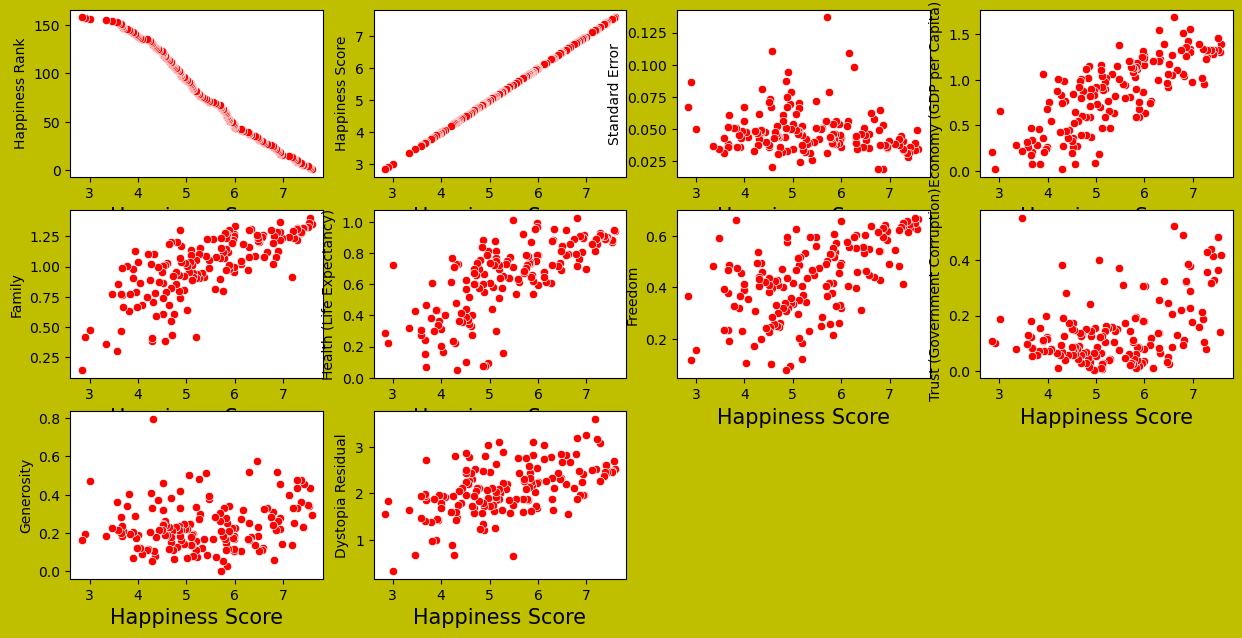

In [525]:
# visualise elationship between features and target
plt.figure(figsize=(15,10),facecolor='y')
p=1
for column in contineous_data_col:
    if p<=15:
        plt.subplot(4,4,p)
        sns.scatterplot(x='Happiness Score',y=column,data=data,color='r')
        plt.xlabel('Happiness Score',fontsize=15)
        plt.ylabel(column)
    p+=1
plt.show()

In [30]:
# from scatterplot we can see that gdp,family,health ,freedom, trust  and generosity have positve corelated with target happiness index score
# 

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
147,Central African Republic,Sub-Saharan Africa,148,3.678,0.06112,0.0785,0.0,0.06699,0.48879,0.08289,0.23835,2.7223


<Figure size 1500x1000 with 0 Axes>

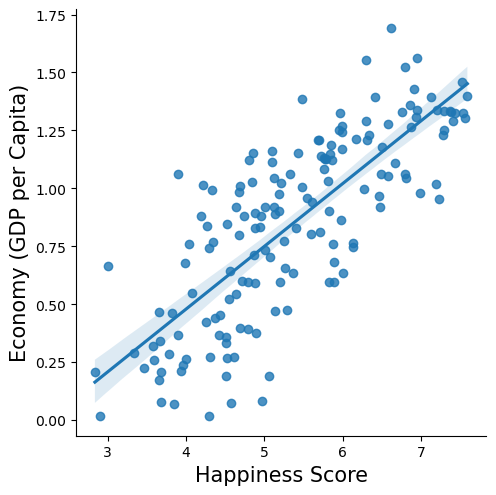

In [526]:
plt.figure(figsize=(15,10),facecolor='y')

sns.lmplot(x='Happiness Score',y='Economy (GDP per Capita)',data=data,palette='dark')
plt.xlabel('Happiness Score',fontsize=15)
plt.ylabel('Economy (GDP per Capita)',fontsize=15)
plt.show()

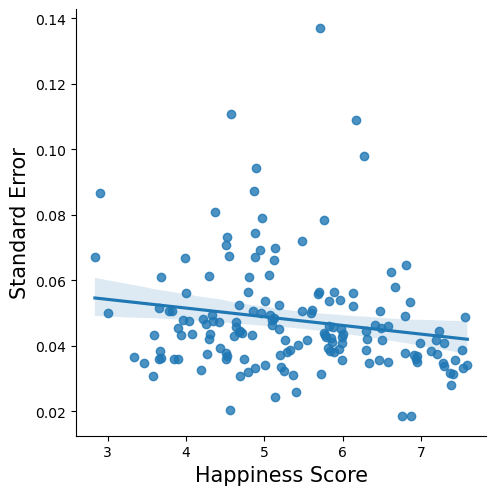

In [293]:
# positive corelation between gdp and happiness score ,gdp increses happiness score also increses


sns.lmplot(x='Happiness Score',y='Standard Error',data=data,palette='muted')
plt.xlabel('Happiness Score',fontsize=15)
plt.ylabel('Standard Error',fontsize=15)
plt.show()


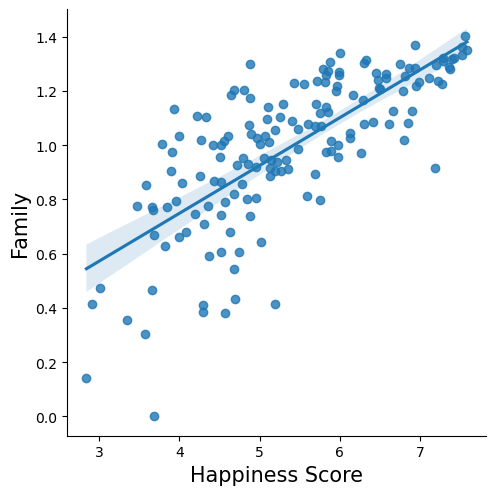

In [294]:
# from above plot we can see that standard error and happiness score have negative corelation happiness score increses standard error slightly decreses
sns.lmplot(x='Happiness Score',y='Family',data=data,palette='pastel')
plt.xlabel('Happiness Score',fontsize=15)
plt.ylabel('Family',fontsize=15)
plt.show()

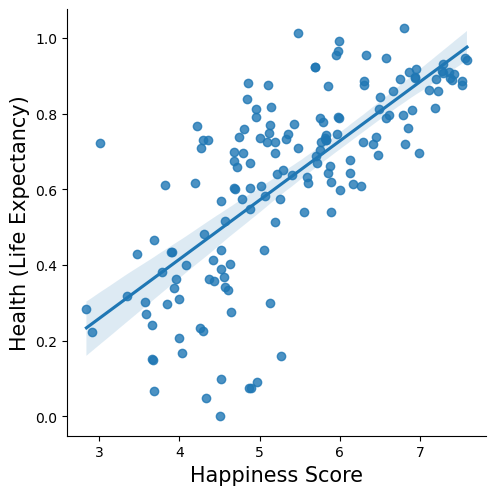

In [295]:
# positive corelation between family and happiness score ,family increses happiness score also increses
sns.lmplot(x='Happiness Score',y='Health (Life Expectancy)',data=data,palette='bright')
plt.xlabel('Happiness Score',fontsize=15)
plt.ylabel('Health (Life Expectancy)',fontsize=15)
plt.show()

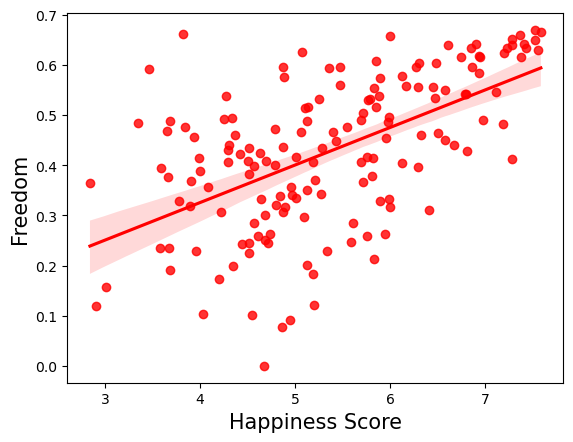

In [296]:
# positive corelation between health and happiness score ,health increses happiness score also increses
sns.regplot(x='Happiness Score',y='Freedom',data=data,color='r')
plt.xlabel('Happiness Score',fontsize=15)
plt.ylabel('Freedom',fontsize=15)
plt.show()

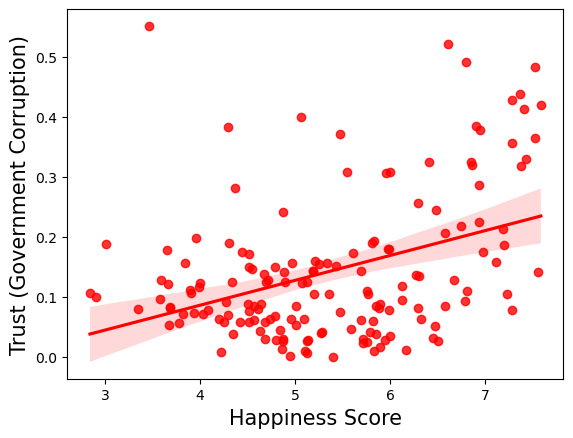

In [297]:
# slightly positive corelation between freedom score and happiness score ,freedom score  increses happiness score also increses

sns.regplot(x='Happiness Score',y='Trust (Government Corruption)',data=data,color='r')
plt.xlabel('Happiness Score',fontsize=15)
plt.ylabel('Trust (Government Corruption)',fontsize=15)
plt.show()

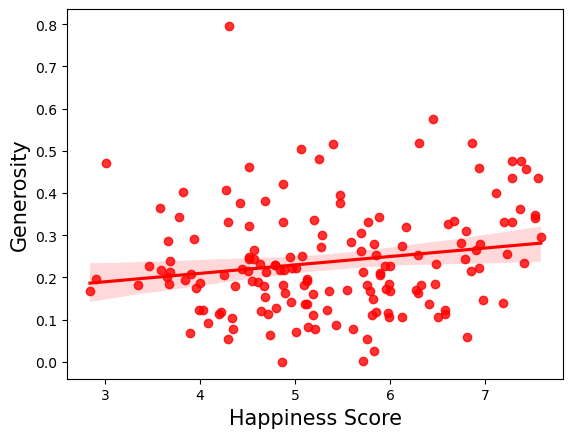

In [298]:
# slightly positive corelation between trust(govt correption score) and happiness score ,trust(govt correption) score increses happiness score also increses
sns.regplot(x='Happiness Score',y='Generosity',data=data,color='r')
plt.xlabel('Happiness Score',fontsize=15)
plt.ylabel('Generosity',fontsize=15)
plt.show()

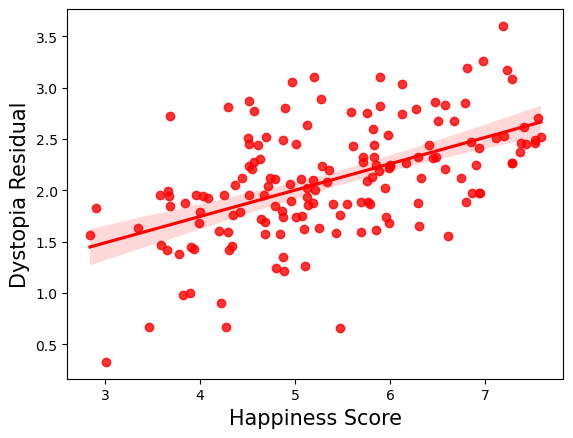

In [299]:
# slightly positive corelation between generosity score and happiness score ,generosity score  increses happiness score also increses

sns.regplot(x='Happiness Score',y='Dystopia Residual',data=data,color='r')
plt.xlabel('Happiness Score',fontsize=15)
plt.ylabel('Dystopia Residual',fontsize=15)
plt.show()

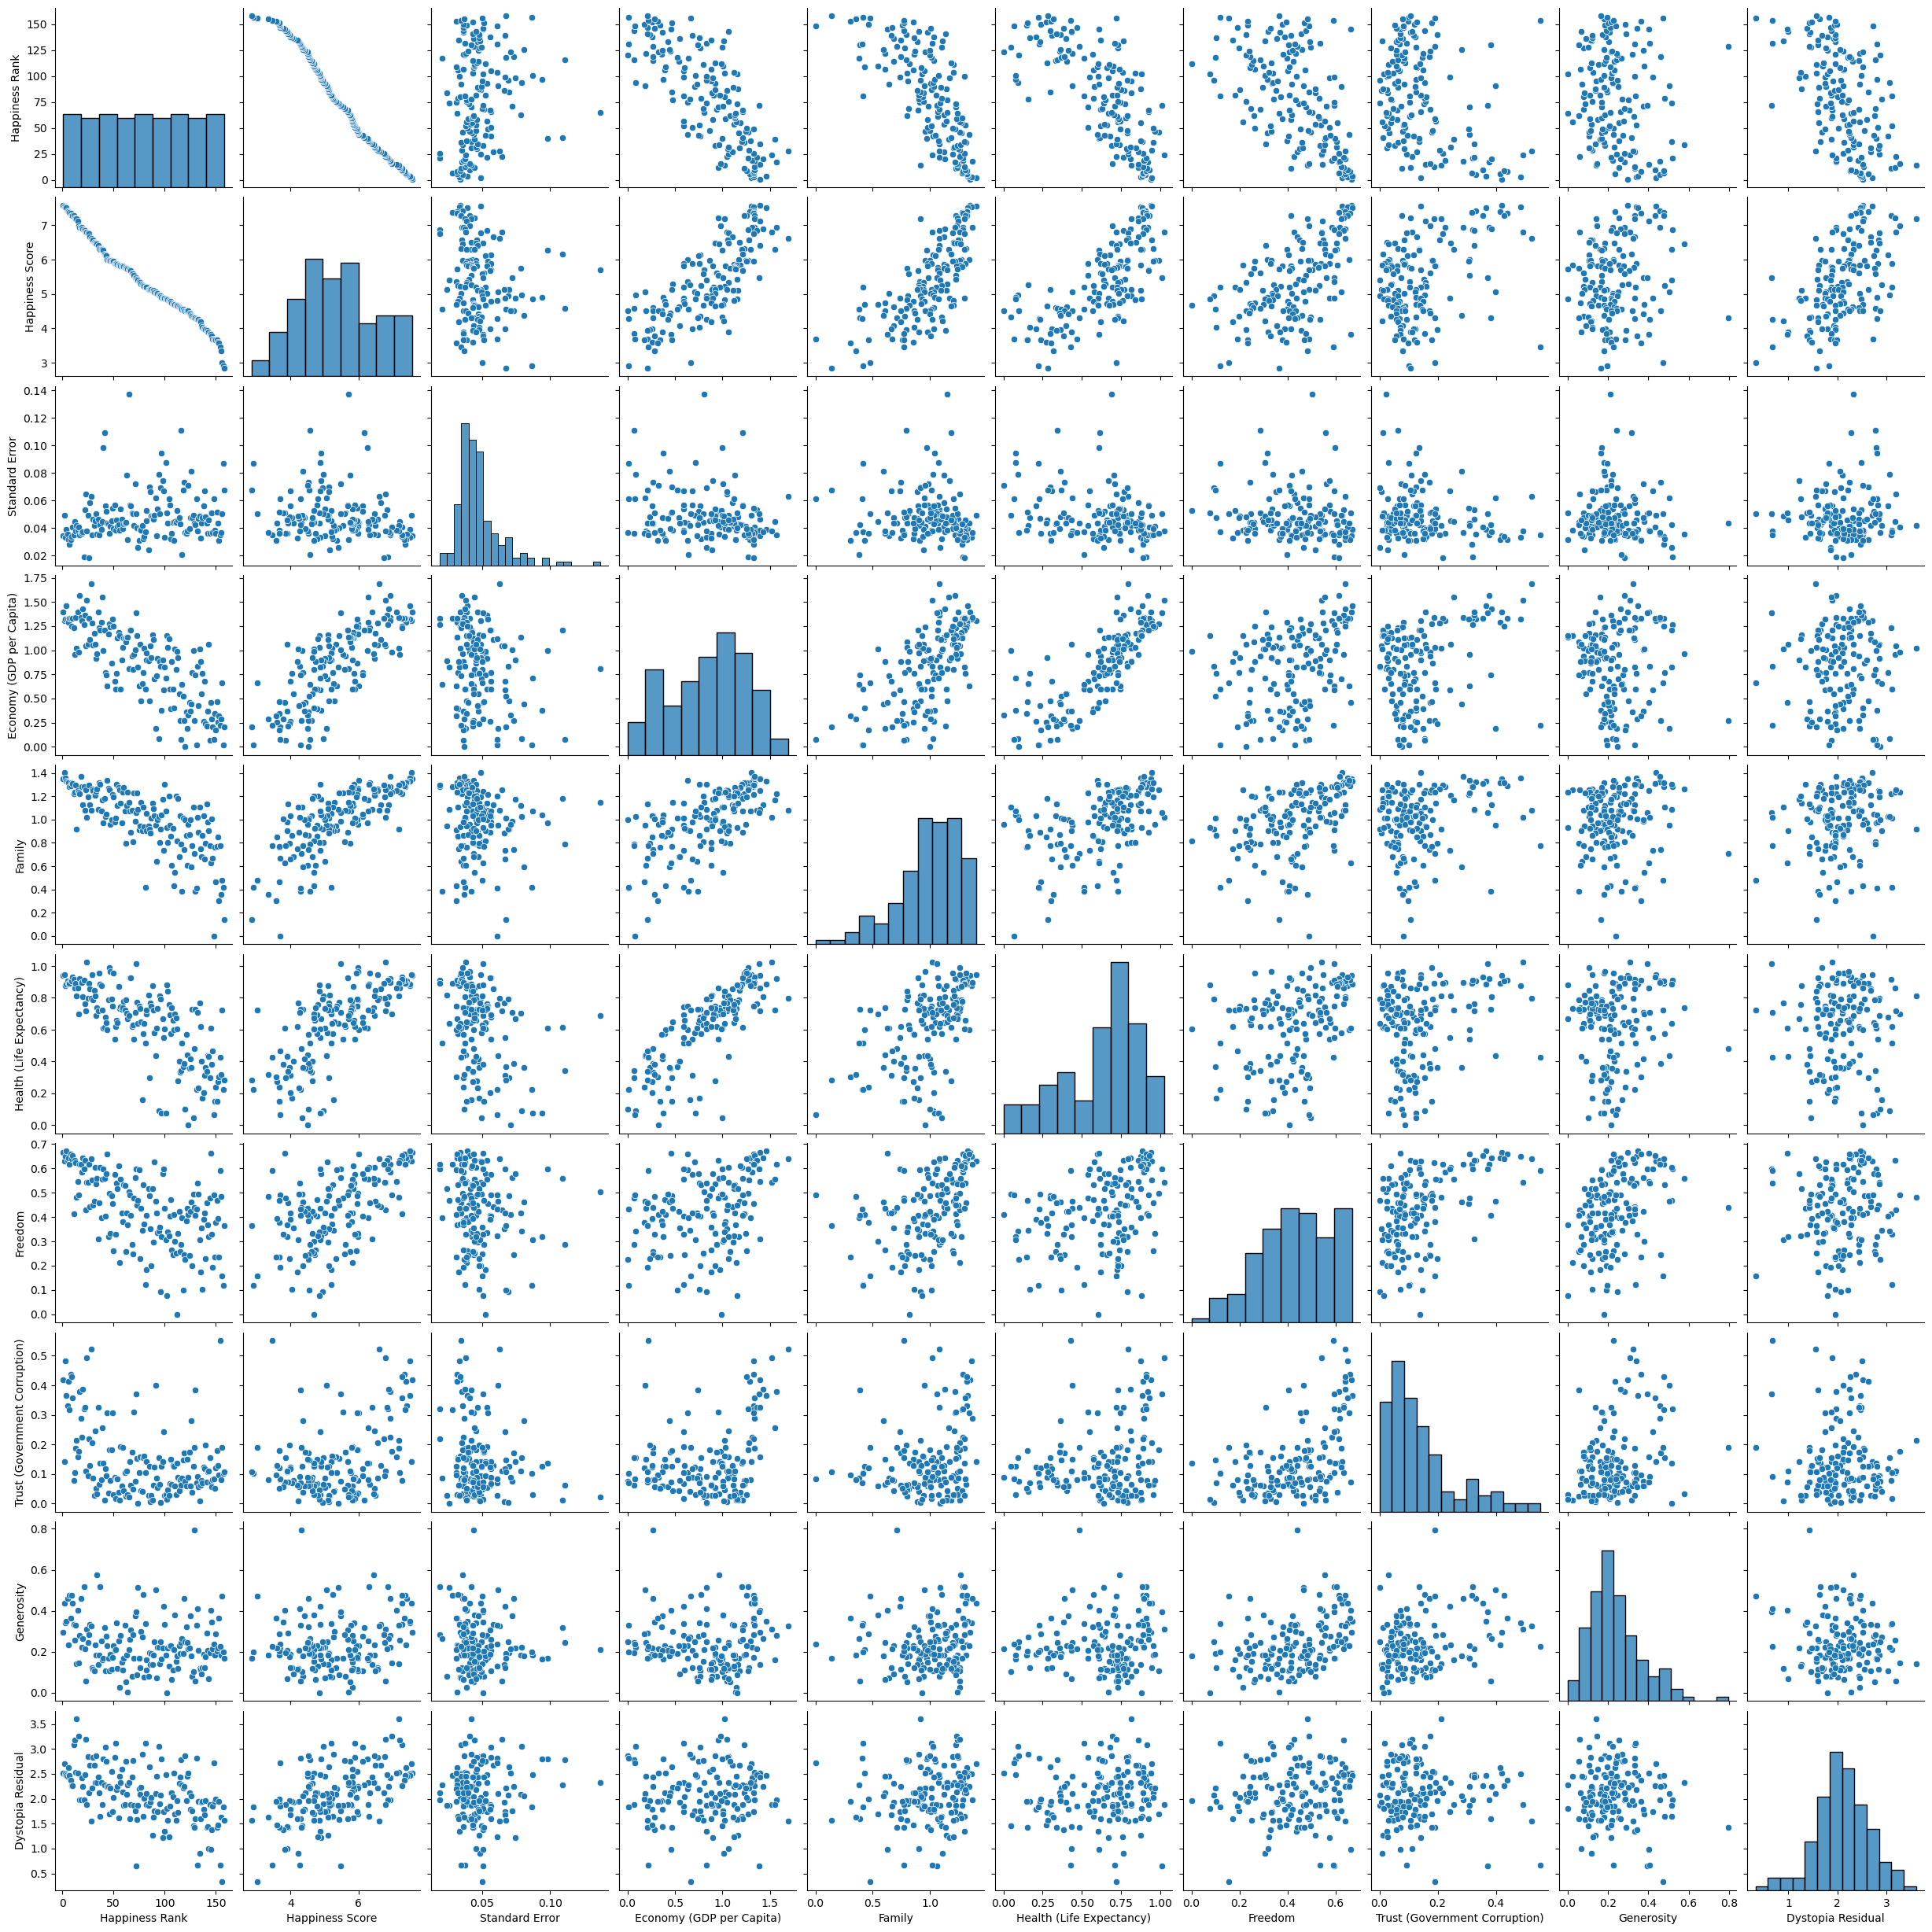

In [300]:
# slightly positive corelation between  Dystopia Residual score and happiness score ,Dystopia Residual score  increses happiness score also increses
sns.pairplot(data=data,palette='dark2')

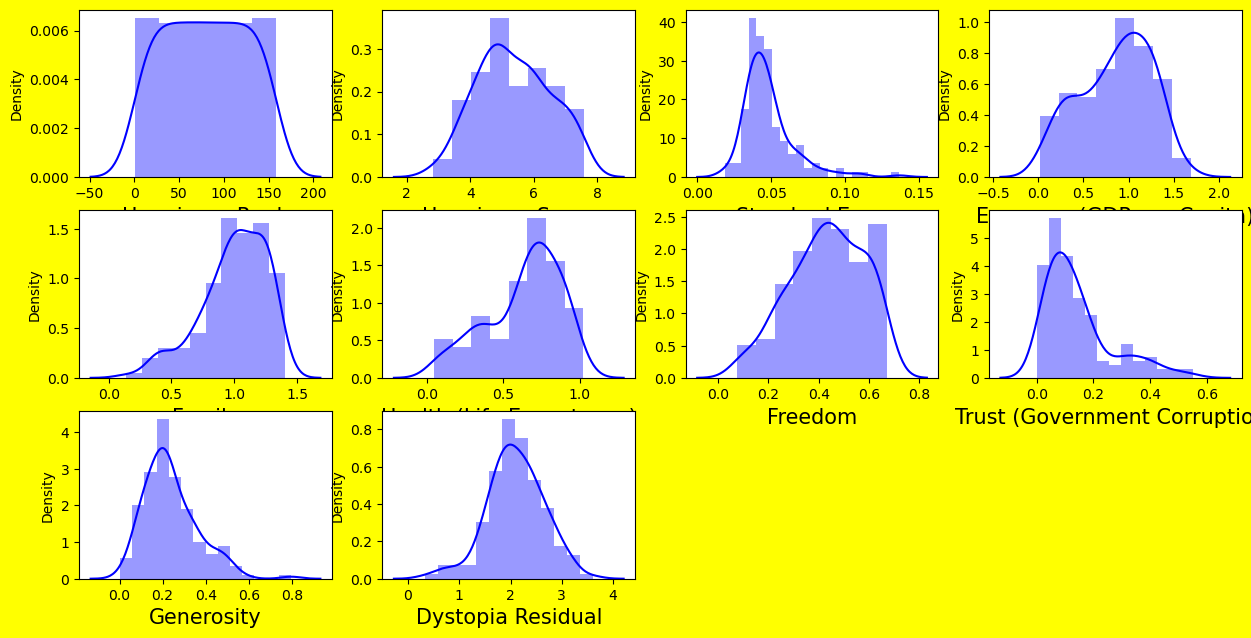

In [527]:
# check normal distribution 
plt.figure(figsize=(15,10),facecolor='yellow')
p=1
for column in contineous_data_col:
    if p<=15:
        plt.subplot(4,4,p)
        sns.distplot(data[column],color='b')
        plt.xlabel(column,fontsize=15)
    p+=1
plt.show()

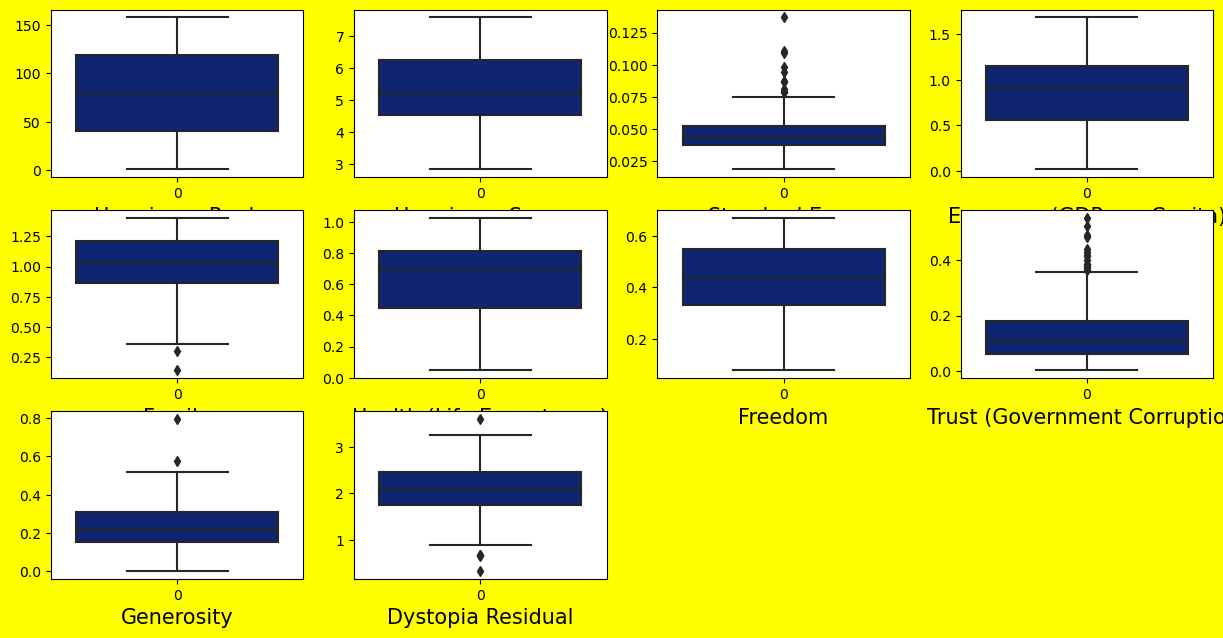

In [528]:
# we can see that all contineous data normally distributed
# check outliers present or not
plt.figure(figsize=(15,10),facecolor='yellow')
p=1
for column in contineous_data_col:
    if p<=15:
        plt.subplot(4,4,p)
        sns.boxplot(data[column],palette='dark')
        plt.xlabel(column,fontsize=15)
    p+=1
plt.show()

In [84]:
contineous_data_col

['Happiness Rank',
 'Happiness Score',
 'Standard Error',
 'Economy (GDP per Capita)',
 'Family',
 'Health (Life Expectancy)',
 'Freedom',
 'Trust (Government Corruption)',
 'Generosity',
 'Dystopia Residual']

In [529]:
# outliers present in column names standard error, family, trust,generosity, destopia residual 
# remove outliers using zscore or iqr method
# first we will check with zscore
from scipy.stats import zscore
outlier_features=data[['Standard Error', 'Family', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']]
z=np.abs(zscore(outlier_features))
z

,Standard Error,Family,Trust (Government Corruption),Generosity,Dystopia Residual
0,0.805926,1.355990,2.312671,0.464398,0.758258
1,0.055889,1.558970,0.024177,1.581852,1.092857
2,0.854487,1.398611,2.848249,0.821692,0.712335
3,0.531526,1.284531,1.852992,0.866544,0.663893
4,0.722845,1.252421,1.555271,1.756534,0.639337
...,...,...,...,...,...
153,0.774917,0.860964,3.422029,0.100255,2.588925
154,0.662582,2.477411,0.539269,0.450100,0.843967
155,0.132534,2.011427,0.375555,1.866101,3.208430
156,2.263962,2.238663,0.366984,0.332604,0.481985


In [579]:
np.where(z>2.5)

(array([  2,  13,  23,  27,  33,  39,  40,  64,  71,  96, 115, 128, 131,
        152, 153, 153, 155, 157], dtype=int64),
 array([2, 4, 2, 2, 3, 0, 0, 0, 4, 0, 0, 3, 4, 1, 2, 4, 4, 1], dtype=int64))

In [580]:
z.iloc[157,1]

3.300996281117402

In [581]:
data1=data[(z<2.5).all(axis=1)]

In [582]:
data1.shape

(141, 12)

In [583]:
# we will check with iqr 
q1=outlier_features.quantile(0.25)
q3=outlier_features.quantile(0.75)
iqr=q3-q1
data2=data[~((data<(q1-1.5*iqr))|(data>(q3+1.5*iqr))).any(axis=1)]

In [584]:
data2.shape

(127, 12)

In [585]:
# check data loss % 
print('data loss percentage with zscore ',((data.shape[0]-data1.shape[0])/data.shape[0])*100)

data loss percentage with zscore  10.759493670886076


In [586]:
print('data loss percentage with iqr ',((data.shape[0]-data2.shape[0])/data.shape[0])*100)

data loss percentage with iqr  19.62025316455696


In [578]:
data.skew()

Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.310193
Family                          -0.868321
Health (Life Expectancy)        -0.687847
Freedom                         -0.343236
Trust (Government Corruption)    1.392773
Generosity                       1.044168
Dystopia Residual               -0.238911
dtype: float64

In [587]:
# less data loss in zscore  so we will choose zscore
# lets check skewness
data1.skew()

Happiness Rank                  -0.034678
Happiness Score                  0.201835
Standard Error                   0.913937
Economy (GDP per Capita)        -0.387856
Family                          -0.759753
Health (Life Expectancy)        -0.738000
Freedom                         -0.298967
Trust (Government Corruption)    1.232849
Generosity                       0.694556
Dystopia Residual                0.104145
dtype: float64

In [539]:
data1['Standard Error'].min()

0.01848

In [588]:
small_constant=1e-10
data1['Standard Error']=data1['Standard Error'].apply(lambda x: np.nan if x<0 else x )
data1['Standard Error']=data1['Standard Error'].replace(0,small_constant)
data1['Standard Error']=np.cbrt(data1['Standard Error'])

In [589]:
data1.isna().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [590]:
small_constant=1e-10
data1['Trust (Government Corruption)']=data1['Trust (Government Corruption)'].apply(lambda x: np.nan if x<0 else x )
data1['Trust (Government Corruption)']=data1['Trust (Government Corruption)'].replace(0,small_constant)
data1['Trust (Government Corruption)']=np.cbrt(data1['Trust (Government Corruption)'])

In [591]:
data1.skew()

Happiness Rank                  -0.034678
Happiness Score                  0.201835
Standard Error                   0.261364
Economy (GDP per Capita)        -0.387856
Family                          -0.759753
Health (Life Expectancy)        -0.738000
Freedom                         -0.298967
Trust (Government Corruption)    0.104219
Generosity                       0.694556
Dystopia Residual                0.104145
dtype: float64

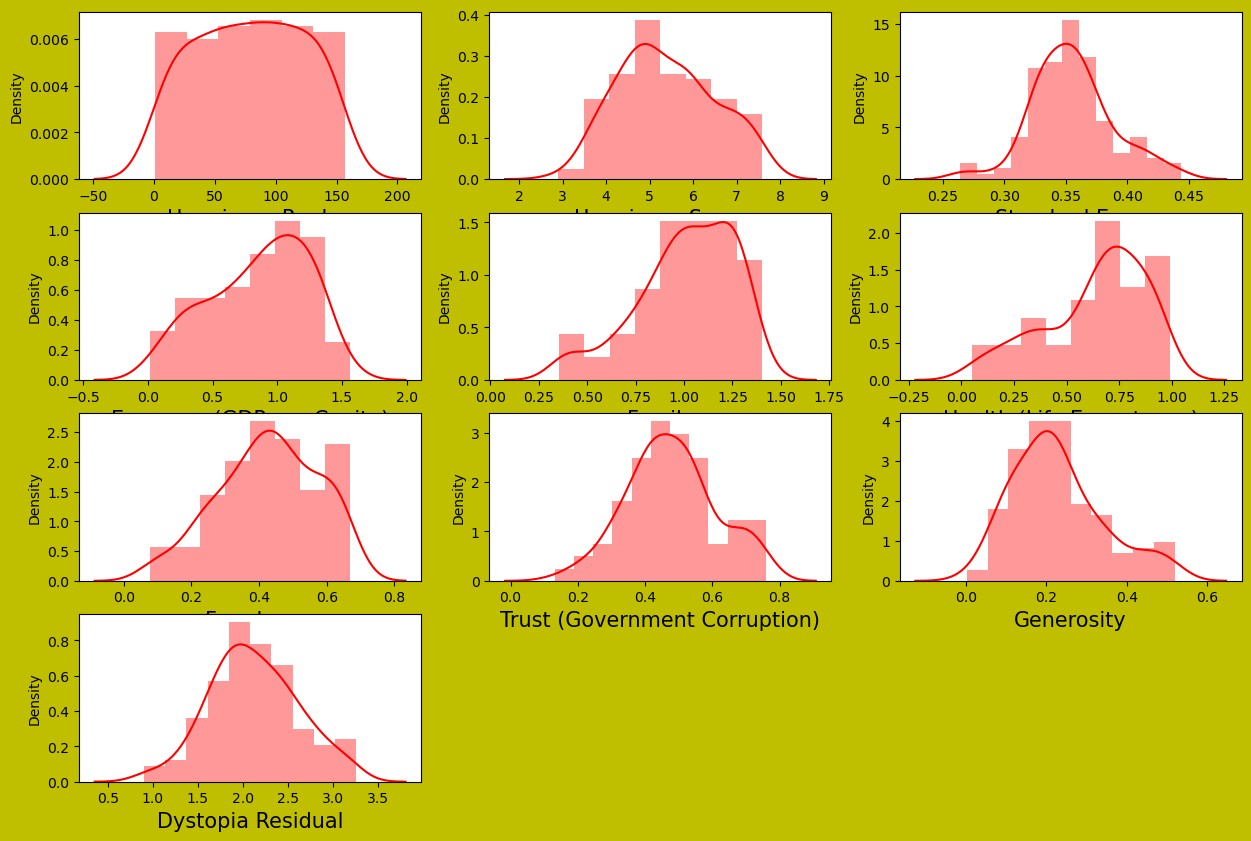

In [592]:
# check normal distribution 
plt.figure(figsize=(15,10),facecolor='y')
p=1
for column in contineous_data_col:
    if p<12:
        plt.subplot(4,3,p)
        sns.distplot(data1[column],color='r')
        plt.xlabel(column,fontsize=15)
    p+=1
plt.show()

In [593]:
# convert categorical data to contineous data
# label encoder to convert 
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data1['Country']=le.fit_transform(data1['Country'])

In [594]:
from sklearn.preprocessing import OrdinalEncoder

oe=OrdinalEncoder()
data1['Region']=oe.fit_transform(data1['Region'].values.reshape(-1,1))

In [595]:
data1.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,122,9.0,1,7.587,0.324310,1.39651,1.34951,0.94143,0.66557,0.748756,0.29678,2.51738
1,55,9.0,2,7.561,0.365532,1.30232,1.40223,0.94784,0.62877,0.521036,0.43630,2.70201
3,97,9.0,4,7.522,0.338540,1.45900,1.33095,0.88521,0.66973,0.714677,0.34699,2.46531
4,23,5.0,5,7.427,0.328749,1.32629,1.32261,0.90563,0.63297,0.690742,0.45811,2.45176
5,43,9.0,6,7.406,0.315483,1.29025,1.31826,0.88911,0.64169,0.745136,0.23351,2.61955


In [474]:
# all features almost normally distributed
data1.corr()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,1.000000,0.002420,-0.136153,0.131053,-0.010708,0.041165,0.201548,0.073038,0.084768,0.036944,0.092901,0.039570
Region,0.002420,1.000000,0.192472,-0.154271,-0.040355,-0.223843,-0.127801,-0.333472,0.099399,0.224688,0.326520,-0.051713
Happiness Rank,-0.136153,0.192472,1.000000,-0.993037,0.228307,-0.777031,-0.715197,-0.741189,-0.563084,-0.383304,-0.218908,-0.508202
Happiness Score,0.131053,-0.154271,-0.993037,1.000000,-0.245926,0.778809,0.715652,0.736839,0.579019,0.410524,0.244663,0.509744
Standard Error,-0.010708,-0.040355,0.228307,-0.245926,1.000000,-0.269538,-0.129289,-0.331781,-0.193612,-0.145792,-0.150714,0.037023
Economy (GDP per Capita),0.041165,-0.223843,-0.777031,0.778809,-0.269538,1.000000,0.630926,0.798991,0.368694,0.237487,0.032575,0.032185
Family,0.201548,-0.127801,-0.715197,0.715652,-0.129289,0.630926,1.000000,0.503626,0.472416,0.195618,0.151713,0.117012
Health (Life Expectancy),0.073038,-0.333472,-0.741189,0.736839,-0.331781,0.798991,0.503626,1.000000,0.383262,0.166325,0.141691,0.026057
Freedom,0.084768,0.099399,-0.563084,0.579019,-0.193612,0.368694,0.472416,0.383262,1.000000,0.526144,0.405176,0.056755
Trust (Government Corruption),0.036944,0.224688,-0.383304,0.410524,-0.145792,0.237487,0.195618,0.166325,0.526144,1.000000,0.292270,0.096495


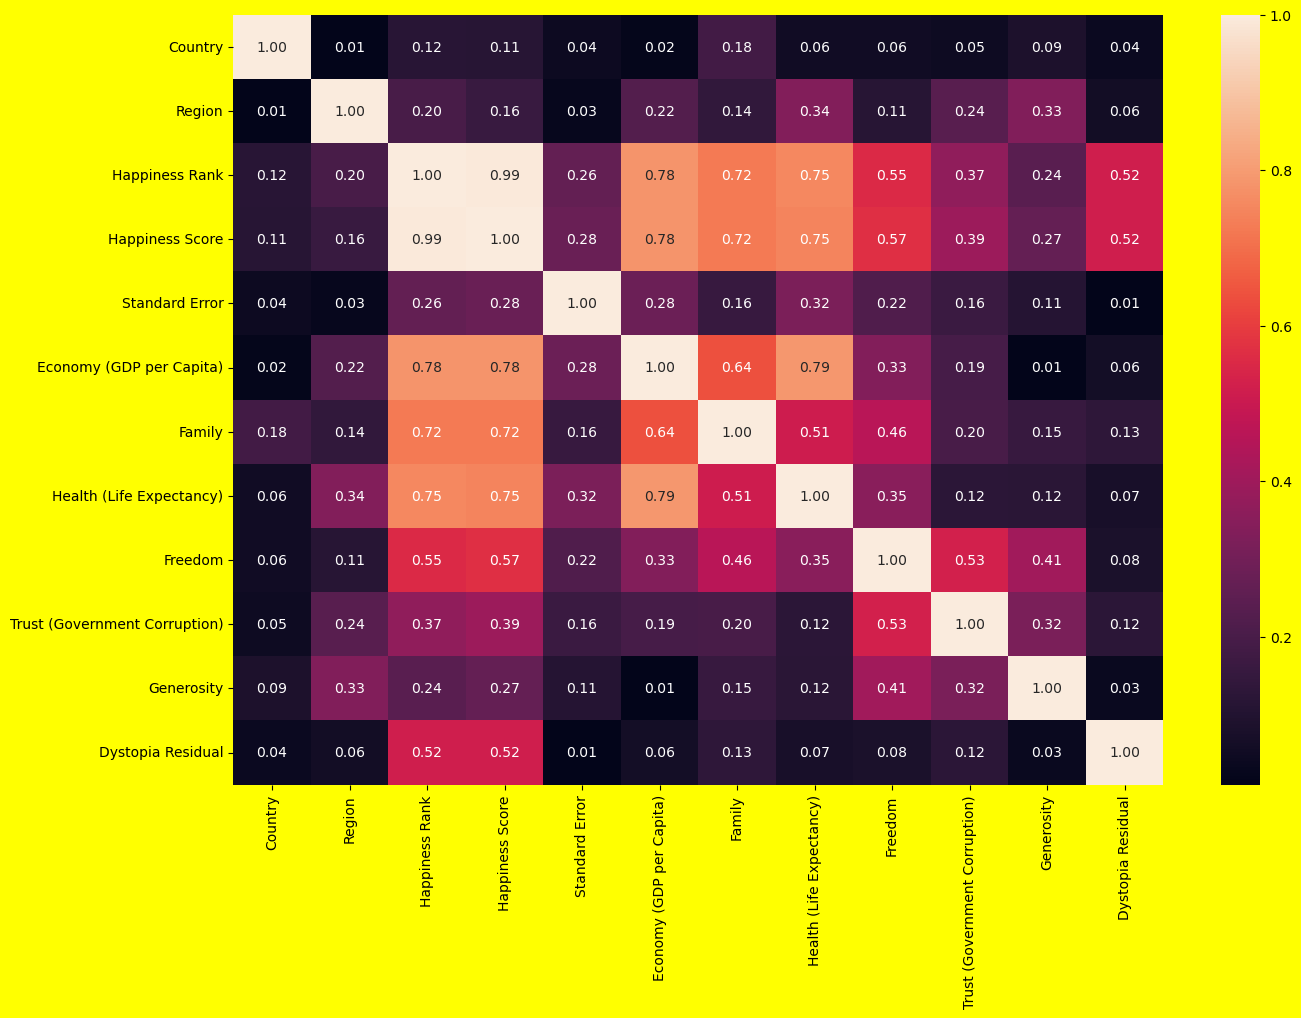

In [596]:
data_corr=data1.corr().abs()
plt.figure(figsize=(15,10),facecolor='yellow')
sns.heatmap(data_corr,annot=True,fmt='0.2f',linecolor='black')
plt.show()

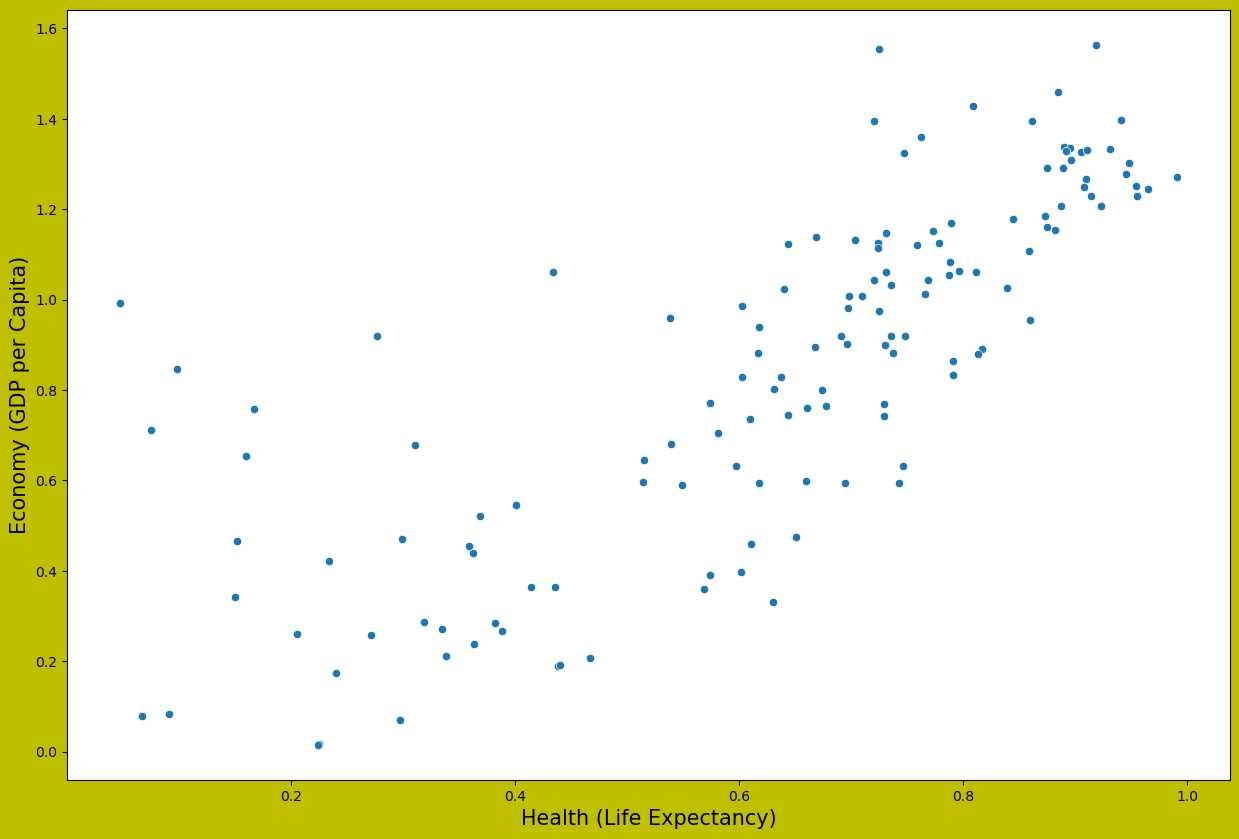

In [597]:
# we can see that  features like healh life expectancy and economy(gdp) strongly corelated
# happiness rank and economy(gdp) strongly corelated but we need proof
# visualise to see any corelation between health life expectancy and economy(gdp)
plt.figure(figsize=(15,10),facecolor='y')
sns.scatterplot(x='Health (Life Expectancy)',y='Economy (GDP per Capita)',data=data1,palette='Dark2')
plt.xlabel('Health (Life Expectancy)',fontsize=15)
plt.ylabel('Economy (GDP per Capita)',fontsize=15)  
plt.show()

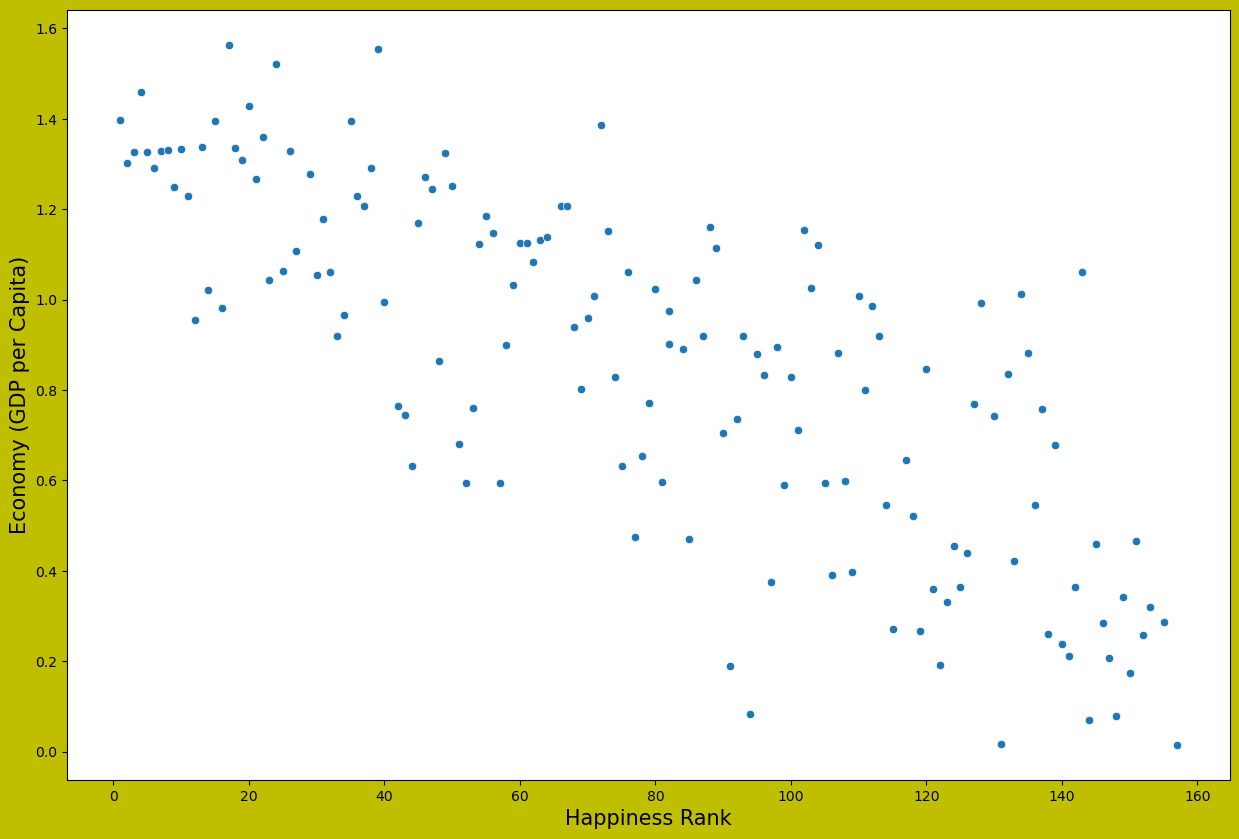

In [477]:
plt.figure(figsize=(15,10),facecolor='y')
sns.scatterplot(x='Happiness Rank',y='Economy (GDP per Capita)',data=data1,palette='Dark2')
plt.xlabel('Happiness Rank',fontsize=15)
plt.ylabel('Economy (GDP per Capita)',fontsize=15)  
plt.show()

In [ ]:
#health life expectancy and economy(gdp) strong positive corelation
# happiness rank and economy (gdp) strong negative corelation

In [598]:
data1.isna().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual


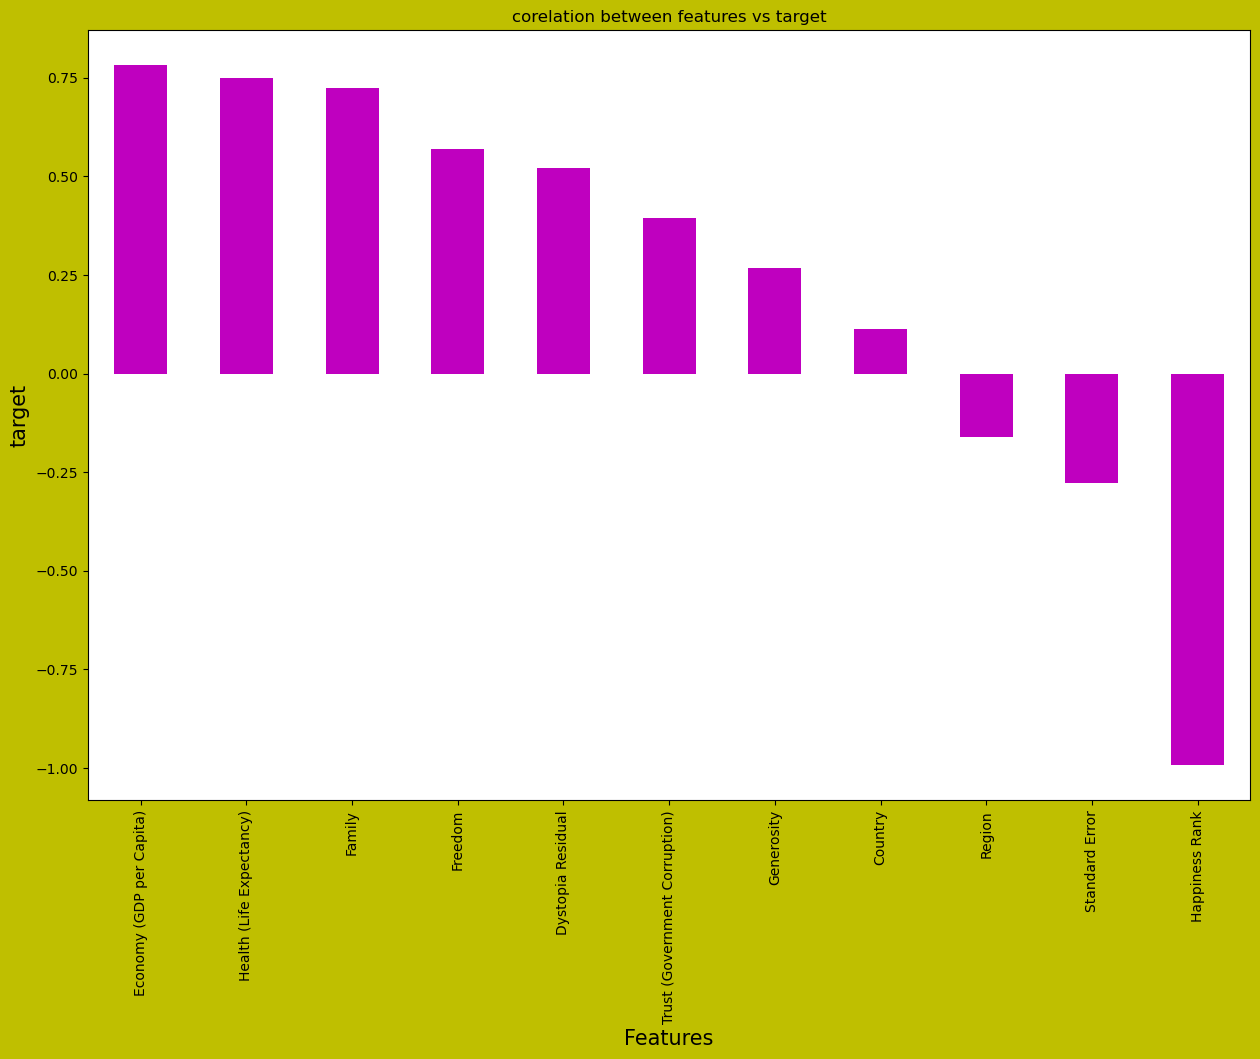

In [599]:
# check target vs features relationship
plt.figure(figsize=(15,10),facecolor='y')
data1.corr()['Happiness Score'].sort_values(ascending=False).drop(['Happiness Score']).plot(kind='bar',color='m')
plt.xlabel('Features',fontsize=15)
plt.ylabel('target',fontsize=15)
plt.title('corelation between features vs target')
plt.show()                                                                          

In [600]:
# we can see that features like region and country contributing less to the target so we can delete these columns
x=data1.drop(['Happiness Score'],axis=1)
y=data1['Happiness Score']
x

,Country,Region,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,122,9.0,1,0.324310,1.39651,1.34951,0.94143,0.66557,0.748756,0.29678,2.51738
1,55,9.0,2,0.365532,1.30232,1.40223,0.94784,0.62877,0.521036,0.43630,2.70201
3,97,9.0,4,0.338540,1.45900,1.33095,0.88521,0.66973,0.714677,0.34699,2.46531
4,23,5.0,5,0.328749,1.32629,1.32261,0.90563,0.63297,0.690742,0.45811,2.45176
5,43,9.0,6,0.315483,1.29025,1.31826,0.88911,0.64169,0.745136,0.23351,2.61955
...,...,...,...,...,...,...,...,...,...,...,...
149,51,8.0,150,0.329887,0.17417,0.46475,0.24009,0.37725,0.495140,0.28657,1.99172
150,63,8.0,151,0.371834,0.46534,0.77115,0.15185,0.46866,0.563805,0.20165,1.41723
151,19,8.0,152,0.350990,0.25812,0.85188,0.27125,0.39493,0.504388,0.21747,1.46494
154,12,8.0,155,0.331896,0.28665,0.35386,0.31910,0.48450,0.431066,0.18260,1.63328


0

In [601]:
# feature values scaling 
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Country,Region,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1.277573,1.287228,-1.758774,-0.948764,1.414007,1.370155,1.277938,1.644099,2.034746,0.604841,0.804211
1,-0.368531,1.287228,-1.736236,0.309764,1.167780,1.582529,1.304767,1.391333,0.315999,1.825430,1.182217
2,0.663355,1.287228,-1.691159,-0.514303,1.577365,1.295390,1.042631,1.672673,1.777524,1.044103,0.697605
3,-1.154730,-0.020874,-1.668621,-0.813229,1.230442,1.261793,1.128098,1.420181,1.596876,2.016234,0.669863
4,-0.663355,1.287228,-1.646083,-1.218251,1.136228,1.244270,1.058955,1.480076,2.007420,0.051325,1.013391
...,...,...,...,...,...,...,...,...,...,...,...
136,-0.466806,0.960203,1.599408,-0.778508,-1.781373,-2.193953,-1.657490,-0.336268,0.120544,0.515519,-0.272008
137,-0.171981,0.960203,1.621946,0.502176,-1.020211,-0.959671,-2.026815,0.291595,0.638803,-0.227402,-1.448200
138,-1.253004,0.960203,1.644485,-0.134197,-1.561915,-0.634464,-1.527072,-0.214830,0.190348,-0.089001,-1.350520
139,-1.424985,0.960203,1.712099,-0.717162,-1.487333,-2.640655,-1.326797,0.400394,-0.363056,-0.394061,-1.005866


In [205]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [602]:
# checking for multicolinearity in features
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['features']=x.columns
vif

,vif values,features
0,1.079868,Country
1,1.513670,Region
2,38.752110,Happiness Rank
3,1.162948,Standard Error
4,8.089750,Economy (GDP per Capita)
5,3.910380,Family
6,6.081268,Health (Life Expectancy)
7,2.628352,Freedom
8,1.820637,Trust (Government Corruption)
9,1.738474,Generosity


In [483]:
# according to vif we can see that happiness rank has multicolinearity BUT IT CONTRIBUTES ALMOST 100% TO TARGET


In [603]:
#l3etecheck vif in each columns
vif=pd.DataFrame()
vif['vif values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['features']=x.columns
vif

,vif values,features
0,1.079868,Country
1,1.513670,Region
2,38.752110,Happiness Rank
3,1.162948,Standard Error
4,8.089750,Economy (GDP per Capita)
5,3.910380,Family
6,6.081268,Health (Life Expectancy)
7,2.628352,Freedom
8,1.820637,Trust (Government Corruption)
9,1.738474,Generosity


In [604]:
# no multicolinearity in features 
# model building
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression



In [605]:
maxACC=0
maxRS=0
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    gbt=GradientBoostingRegressor()
    gbt.fit(x_train,y_train)
    pred=gbt.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxACC:
        maxACC=acc
        maxRS=i
print('max accuracy is ',maxACC,'on random state',maxRS)

max accuracy is  0.9992477157638378 on random state 9


In [606]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxRS)

In [607]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge,Lasso


In [608]:
GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
GBR_pred=GBR.predict(x_test)
GBR_pred_train=GBR.predict(x_train)
print('R2 score ',r2_score(y_test,GBR_pred)*100)
print('R2 score for training data',r2_score(y_train,GBR_pred_train)*100)
print('Mean absolute error ',mean_absolute_error(y_test,GBR_pred))
print('Mean squared error ',mean_squared_error(y_test,GBR_pred))
print('Root mean squared error ',np.sqrt(mean_absolute_error(y_test,GBR_pred)))

R2 score  99.91520916806795
R2 score for training data 99.99996794499482
Mean absolute error  0.02330890440581315
Mean squared error  0.0009233828794289904
Root mean squared error  0.15267253978962014


In [609]:
LR=LinearRegression()
LR.fit(x_train,y_train)
LR_pred=LR.predict(x_test)
LR_pred_train=LR.predict(x_train)
print('R2 score ',r2_score(y_test,LR_pred)*100)
print('R2 score for training data',r2_score(y_train,LR_pred_train)*100)
print('Mean absolute error ',mean_absolute_error(y_test,LR_pred))
print('Mean squared error ',mean_squared_error(y_test,LR_pred))
print('Root mean squared error ',np.sqrt(mean_absolute_error(y_test,LR_pred)))

R2 score  99.43292271591245
R2 score for training data 99.33644828306586
Mean absolute error  0.0647134657625037
Mean squared error  0.006175543316512707
Root mean squared error  0.25438841514995075


In [610]:
DT=DecisionTreeRegressor()
DT.fit(x_train,y_train)
DT_pred=DT.predict(x_test)
DT_pred_train=DT.predict(x_train)
print('R2 score ',r2_score(y_test,DT_pred)*100)
print('R2 score for training data',r2_score(y_train,DT_pred_train)*100)
print('Mean absolute error ',mean_absolute_error(y_test,DT_pred))
print('Mean squared error ',mean_squared_error(y_test,DT_pred))
print('Root mean squared error ',np.sqrt(mean_absolute_error(y_test,DT_pred)))

R2 score  99.360115913017
R2 score for training data 100.0
Mean absolute error  0.04818604651162792
Mean squared error  0.006968418604651168
Root mean squared error  0.21951320350181197


In [611]:
KNN=KNeighborsRegressor()
KNN.fit(x_train,y_train)
KNN_pred=KNN.predict(x_test)
KNN_pred_train=KNN.predict(x_train)
print('R2 score ',r2_score(y_test,KNN_pred)*100)
print('R2 score for training data',r2_score(y_train,KNN_pred_train)*100)
print('Mean absolute error ',mean_absolute_error(y_test,KNN_pred))
print('Mean squared error ',mean_squared_error(y_test,KNN_pred))
print('Root mean squared error ',np.sqrt(mean_absolute_error(y_test,KNN_pred)))

R2 score  88.39790187764152
R2 score for training data 94.11052560079177
Mean absolute error  0.2804139534883719
Mean squared error  0.1263483153488371
Root mean squared error  0.5295412670305988


In [612]:
RIDGE=Ridge()
RIDGE.fit(x_train,y_train)
RIDGE_pred=RIDGE.predict(x_test)
RIDGE_pred_train=RIDGE.predict(x_train)
print('R2 score ',r2_score(y_test,RIDGE_pred)*100)
print('R2 score for training data',r2_score(y_train,RIDGE_pred_train)*100)
print('Mean absolute error ',mean_absolute_error(y_test,RIDGE_pred))
print('Mean squared error ',mean_squared_error(y_test,RIDGE_pred))
print('Root mean squared error ',np.sqrt(mean_absolute_error(y_test,RIDGE_pred)))

R2 score  99.4987561655346
R2 score for training data 99.31390373996793
Mean absolute error  0.060732459003583206
Mean squared error  0.005458608727127489
Root mean squared error  0.24643956460678793


In [613]:
LASSO=Lasso()
LASSO.fit(x_train,y_train)
LASSO_pred=LASSO.predict(x_test)
LASSO_pred_train=LASSO.predict(x_train)
print('R2 score ',r2_score(y_test,LASSO_pred)*100)
print('R2 score for training data',r2_score(y_train,LASSO_pred_train)*100)
print('Mean absolute error ',mean_absolute_error(y_test,LASSO_pred))
print('Mean squared error ',mean_squared_error(y_test,LASSO_pred))
print('Root mean squared error ',np.sqrt(mean_absolute_error(y_test,LASSO_pred)))

R2 score  14.017908694280646
R2 score for training data 20.05533477386342
Mean absolute error  0.7831322016729285
Mean squared error  0.9363558446133149
Root mean squared error  0.8849475700135735


In [614]:
from sklearn.svm import SVR
SVM=SVR()
SVM.fit(x_train,y_train)
SVM_pred=SVM.predict(x_test)
SVM_pred_train=SVM.predict(x_train)
print('R2 score ',r2_score(y_test,SVM_pred)*100)
print('R2 score for training data',r2_score(y_train,SVM_pred_train)*100)
print('Mean absolute error ',mean_absolute_error(y_test,SVM_pred))
print('Mean squared error ',mean_squared_error(y_test,SVM_pred))
print('Root mean squared error ',np.sqrt(mean_absolute_error(y_test,SVM_pred)))

R2 score  93.54010773029798
R2 score for training data 98.59749035773564
Mean absolute error  0.177743393663394
Mean squared error  0.07034904350954671
Root mean squared error  0.4215962448402429


In [615]:
from sklearn.ensemble import RandomForestRegressor
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
RFR_pred=RFR.predict(x_test)
RFR_pred_train=RFR.predict(x_train)
print('R2 score ',r2_score(y_test,RFR_pred)*100)
print('R2 score for training data',r2_score(y_train,RFR_pred_train)*100)
print('Mean absolute error ',mean_absolute_error(y_test,RFR_pred))
print('Mean squared error ',mean_squared_error(y_test,RFR_pred))
print('Root mean squared error ',np.sqrt(mean_absolute_error(y_test,RFR_pred)))

R2 score  99.80621071388866
R2 score for training data 99.89844036740466
Mean absolute error  0.03260999999999939
Mean squared error  0.0021103898255813696
Root mean squared error  0.18058239116812966


In [616]:
from sklearn.ensemble import ExtraTreesRegressor
ETR=ExtraTreesRegressor()
ETR.fit(x_train,y_train)
ETR_pred=ETR.predict(x_test)
ETR_pred_train=ETR.predict(x_train)
print('R2 score ',r2_score(y_test,ETR_pred)*100)
print('R2 score for training data',r2_score(y_train,ETR_pred_train)*100)
print('Mean absolute error ',mean_absolute_error(y_test,ETR_pred))
print('Mean squared error ',mean_squared_error(y_test,ETR_pred))
print('Root mean squared error ',np.sqrt(mean_absolute_error(y_test,ETR_pred)))

R2 score  99.84635221191247
R2 score for training data 100.0
Mean absolute error  0.03323395348837243
Mean squared error  0.001673243837209318
Root mean squared error  0.18230181976154936


In [617]:
from sklearn.model_selection import cross_val_score

In [621]:
val_score=cross_val_score(GBR,x,y)
print('R2 score',r2_score(y_test,GBR_pred)*100)
print('validation score ',val_score)
print('average score ',val_score.mean())
print('deference between R2 score and cross validation score ',(r2_score(y_test,GBR_pred)-val_score.mean())*100)

R2 score 99.91520916806795
validation score  [-3.67723788 -1.01285432 -0.28774957 -0.20409455 -2.37696514]
average score  -1.5117802929325845
deference between R2 score and cross validation score  251.09323846132642


In [622]:
val_score1=cross_val_score(LR,x,y)
print('R2 score',r2_score(y_test,LR_pred)*100)
print('validation score ',val_score)
print('average score ',val_score.mean())
print('deference between R2 score and cross validation score ',(r2_score(y_test,LR_pred)-val_score1.mean())*100)

R2 score 99.43292271591245
validation score  [-3.67723788 -1.01285432 -0.28774957 -0.20409455 -2.37696514]
average score  -1.5117802929325845
deference between R2 score and cross validation score  35.65778547278384


In [623]:
val_score2=cross_val_score(DT,x,y)
print('R2 score',r2_score(y_test,DT_pred)*100)
print('validation score ',val_score2)
print('average score ',val_score2.mean())
print('deference between R2 score and cross validation score ',(r2_score(y_test,DT_pred)-val_score2.mean())*100)

R2 score 99.360115913017
validation score  [-4.87914229 -1.51185859 -0.59404631 -0.6746031  -2.18997315]
average score  -1.9699246882952246
deference between R2 score and cross validation score  296.3525847425394


In [573]:
val_score3=cross_val_score(KNN,x,y)
print('R2 score',r2_score(y_test,KNN_pred)*100)
print('validation score ',val_score3)
print('average score ',val_score3.mean()*100)
print('deference between R2 score and cross validation score ',(r2_score(y_test,KNN_pred)-val_score3.mean())*100)

R2 score 91.44009262966387
validation score  [-9.44813306 -2.50873349 -1.95121421 -7.4475113  -4.77530182]
average score  -522.617877591095
deference between R2 score and cross validation score  614.0579702207589


In [624]:
val_score4=cross_val_score(RIDGE,x,y)
print('R2 score',r2_score(y_test,RIDGE_pred)*100)
print('validation score ',val_score4)
print('average score ',val_score4.mean())
print('deference between R2 score and cross validation score ',(r2_score(y_test,RIDGE_pred)-val_score4.mean())*100)

R2 score 99.4987561655346
validation score  [0.56928414 0.79668468 0.88917623 0.20507647 0.83719947]
average score  0.6594841965662874
deference between R2 score and cross validation score  33.55033650890585


In [625]:
val_score5=cross_val_score(SVM,x,y)
print('R2 score',r2_score(y_test,SVM_pred)*100)
print('validation score ',val_score5)
print('average score ',val_score5.mean())
print('deference between R2 score and cross validation score ',(r2_score(y_test,SVM_pred)-val_score5.mean())*100)

R2 score 93.54010773029798
validation score  [-12.14187119   0.36629214   0.47459257  -0.64336187  -7.39554852]
average score  -3.867979373830964
deference between R2 score and cross validation score  480.33804511339434


In [626]:
val_score5=cross_val_score(RFR,x,y)
print('R2 score',r2_score(y_test,RFR_pred)*100)
print('validation score ',val_score5)
print('average score ',val_score5.mean())
print('deference between R2 score and cross validation score ',(r2_score(y_test,RFR_pred)-val_score5.mean())*100)

R2 score 99.80621071388866
validation score  [-4.60628115 -1.98908113 -0.68902561 -1.00210647 -2.71509487]
average score  -2.200317848286455
deference between R2 score and cross validation score  319.83799554253414


In [628]:
val_score6=cross_val_score(ETR,x,y)
print('R2 score',r2_score(y_test,ETR_pred)*100)
print('validation score ',val_score6)
print('average score ',val_score6.mean())
print('deference between R2 score and cross validation score ',(r2_score(y_test,ETR_pred)-val_score6.mean())*100)

R2 score 99.84635221191247
validation score  [-4.04816622  0.62791631  0.91076522  0.89515204 -2.61631662]
average score  -0.846129854792261
deference between R2 score and cross validation score  184.4593376911386


In [629]:
# best performing model is ridge regressor
# hyperparamter tuning
from sklearn.model_selection import GridSearchCV


In [630]:
param={'alpha':[1,.5,.4,2],'fit_intercept':[True,False],'solver':['auto','svd','cholesky','lsqr','sag','saga','lbfgs'],'positive':[True,False],'random_state':[1,4,10,20]}

In [631]:
gscv=GridSearchCV(Ridge(),param,cv=5)
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 0.5, 0.4, 2],
                         'fit_intercept': [True, False],
                         'positive': [True, False],
                         'random_state': [1, 4, 10, 20],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag',
                                    'saga', 'lbfgs']})

In [632]:
gscv.best_params_

{'alpha': 1,
 'fit_intercept': True,
 'positive': False,
 'random_state': 20,
 'solver': 'sag'}

In [633]:
best_model=Ridge(alpha=1,fit_intercept=True,positive=False,random_state=20,solver='sag')

In [635]:
best_model.fit(x_train,y_train)
pred=best_model.predict(x_test)
print('R2 score ', r2_score(y_test,pred))
print('Mean absolute error ',mean_absolute_error(y_test,pred))
print('Mean aquared error ',mean_squared_error(y_test,pred))
print('Root Mean aquared error ',np.sqrt(mean_absolute_error(y_test,pred)))

R2 score  0.9949912112786834
Mean absolute error  0.06070863652432526
Mean aquared error  0.005454634241172629
Root Mean aquared error  0.24639122655712653


In [636]:
import joblib
import pickle


In [637]:
pickle.dump(best_model,open('reg_model','wb'))

In [638]:
loaded_model=pickle.load(open('reg_model','rb'))

In [639]:
new_data=loaded_model.predict(x_test)

In [645]:
print(r2_score(y_test,new_data))
print(mean_absolute_error(y_test,new_data))
print(mean_squared_error(y_test,new_data))
print(np.sqrt(mean_absolute_error(y_test,new_data)))


0.9949912112786834
0.06070863652432526
0.005454634241172629
0.24639122655712653
